<a href="https://colab.research.google.com/github/mzignis/hands_on_machine_learning/blob/master/cnn/cnn_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import load_sample_image

import tensorflow as tf
from tensorflow import keras

sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


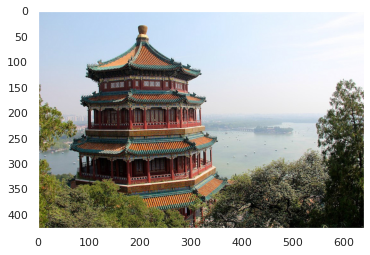

In [2]:
china = load_sample_image("china.jpg") / 255
plt.imshow(china)
plt.grid(False)

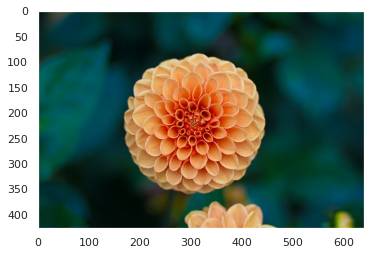

In [3]:
flower = load_sample_image("flower.jpg") / 255
plt.imshow(flower)
plt.grid(False)

In [4]:
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
images.shape

(2, 427, 640, 3)

In [0]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line

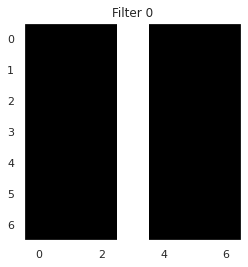

In [6]:
plt.imshow(filters[:, :, :, 0])
plt.grid(False)
plt.title('Filter 0');

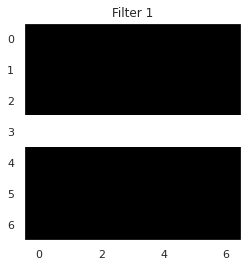

In [7]:
plt.imshow(filters[:, :, :, 1])
plt.grid(False)
plt.title('Filter 1');

(2, 421, 634, 2)


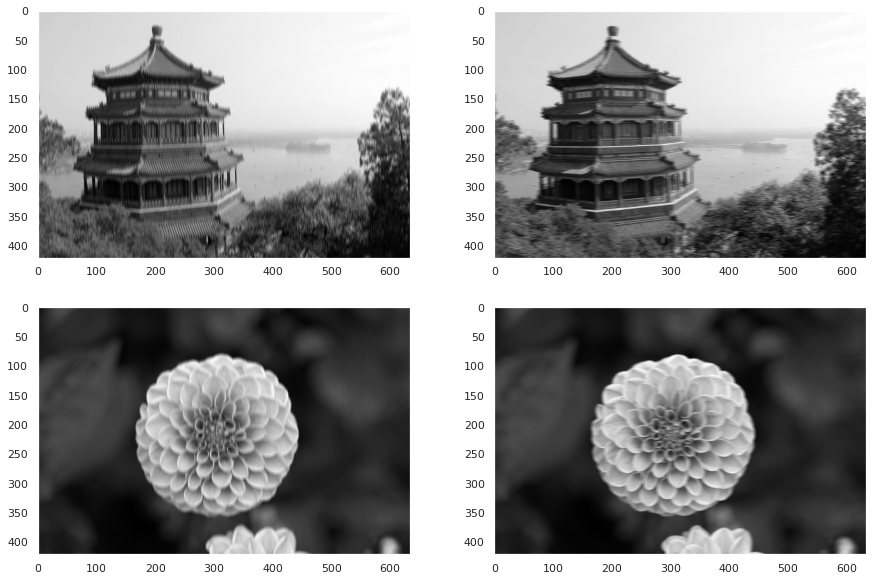

In [8]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="VALID")
print(outputs.shape)


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for row_idx, row in enumerate(axes):
    for col_idx, ax in enumerate(row):
        ax.imshow(outputs[row_idx, :, :, col_idx], cmap="gray")
        ax.grid(False)

In [0]:
# output = tf.nn.max_pool(
#     images, 
#     ksize=[1, 1, 1, 3],
#     strides=[1, 1, 1, 3],
#     padding="VALID"
# )

# output.shape

In [0]:
depth_pool = tf.keras.layers.Lambda(
    lambda X: tf.nn.max_pool(X, 
                             ksize=(1, 1, 1, 3), 
                             strides=(1, 1, 1, 3),
                             padding="VALID")
    )

In [0]:
global_avg_pool = tf.keras.layers.GlobalAvgPool2D()

In [0]:
global_avg_pool = tf.keras.layers.Lambda(lambda X: tf.reduce_mean(X, axis=[1, 2]))

## CNN Architectures

In [14]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [15]:
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0

x_train.shape

(60000, 28, 28, 1)

In [0]:
from functools import partial
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential(
    [
     DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
     keras.layers.MaxPooling2D(pool_size=2),

     DefaultConv2D(filters=128),
     DefaultConv2D(filters=128),
     keras.layers.MaxPooling2D(pool_size=2),
     
     DefaultConv2D(filters=256),
     DefaultConv2D(filters=256),
     keras.layers.MaxPooling2D(pool_size=2),
     
     keras.layers.Flatten(),
     
     keras.layers.Dense(units=128, activation='relu'),
     keras.layers.Dropout(0.5),
     
     keras.layers.Dense(units=64, activation='relu'),
     keras.layers.Dropout(0.5),
     
     keras.layers.Dense(units=10, activation='softmax'),
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         5

In [0]:
model.compile(optimizer='Adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [19]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3933 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1240 - accuracy: 0.9696
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0858 - accuracy: 0.9802
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0724 - accuracy: 0.9826
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0599 - accuracy: 0.9862


In [20]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.0350 - accuracy: 0.9915


[0.03502301126718521, 0.9915000200271606]